In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import e

In [36]:
# Параметры задачи
a, b = 1, 3
UA, UB = -1, 4
epsilon = 0.05

def p(x):
    return 1 + np.cos(x)**2

def q(x):
    return x**2 + 1

def f(x):
    return (x**2 + 1) * np.cos(x)

In [37]:
# Метод конечных разностей
def finite_difference_method(a, b, UA, UB, h):
    N = int((b - a) / h)  # Число точек
    x = np.linspace(a, b, N+1)  # Сетка по x
    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Вектор правой части

    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    A[N, N] = 1
    B[N] = UB

    # Заполнение системы уравнений
    for i in range(1, N):
        xi = x[i]
        A[i, i-1] = 1/h**2 - p(xi) / (2*h)
        A[i, i] = -2/h**2 + q(xi)
        A[i, i+1] = 1/h**2 + p(xi) / (2*h)
        B[i] = f(xi)

    # Решение системы
    U = np.linalg.solve(A, B)

    return x, U

# **Решение тестовой задачи**





In [ ]:
# Параметры ТЕСТОВОЙ задачи
at, bt = 0, 1
UAt, UBt = 1, 1
epsilont = 0.05
ht = 0.1 # Начальный шаг

def pt(x):
    return 3

def qt(x):
    return 2

def ft(x):
    return 0

In [32]:
# Метод конечных разностей
def finite_difference_methodt(a, b, UA, UB, h):
    N = int((b - a) / h)  # Число точек
    x = np.linspace(a, b, N+1)  # Сетка по x
    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Вектор правой части

    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    A[N, N] = 1
    B[N] = UB

    # Заполнение системы уравнений
    for i in range(1, N):
        xi = x[i]
        A[i, i-1] = 1/h**2 - pt(xi) / (2*h)
        A[i, i] = -2/h**2 + qt(xi)
        A[i, i+1] = 1/h**2 + pt(xi) / (2*h)
        B[i] = ft(xi)

    # Решение системы
    U = np.linalg.solve(A, B)

    return x, U

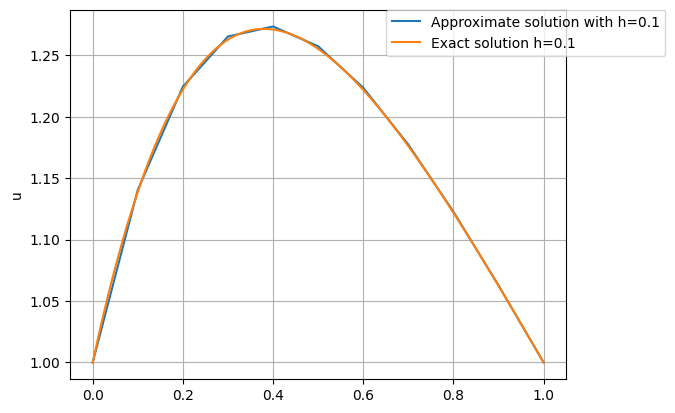

In [34]:
# Решение ТЕСТОВОЙ задачи
xt, Ut = finite_difference_methodt(at, bt, UAt, UBt, ht)
x_exact_test = np.linspace(at, bt,  1000 )  # Сетка по x
u_exact_test = (1 + e)*np.exp(-x_exact_test) - e*np.exp(-2*x_exact_test)

# Построение графика
plt.plot(xt, Ut, label=f'Approximate solution with h={ht}')
plt.plot(x_exact_test, u_exact_test, label=f'Exact solution h={ht}')

plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.grid(True)
plt.show()

# **Решение поставленной задачи**


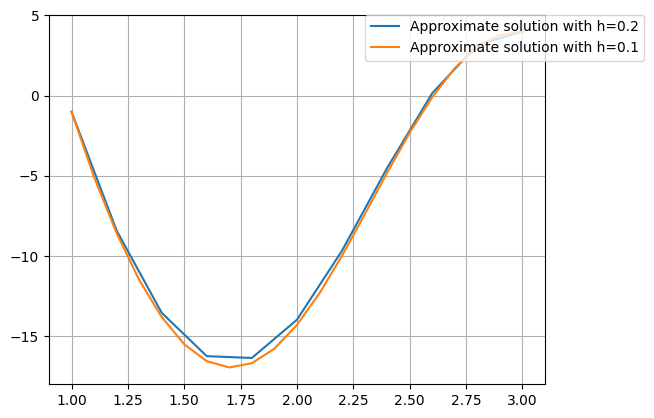

In [41]:
# Начальный шаг
h_start = 0.2

# Решение поставленной задачи
x1, U1 = finite_difference_method(a, b, UA, UB, h_start)
x2, U2 = finite_difference_method(a, b, UA, UB, h_start/2)

# Построение графика
plt.plot(x1, U1, label=f'Approximate solution with h={h_start}')
plt.plot(x2, U2, label=f'Approximate solution with h={h_start/2}')

plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.grid(True)
plt.show()

In [48]:
# Функция для уменьшения шага
def adaptive_step(h_start, epsilon):
    h = h_start
    while True:
        x1, U1 = finite_difference_method(a, b, UA, UB, h)
        x2, U2 = finite_difference_method(a, b, UA, UB, h/2)

        # Интерполяция решения для сравнения
        U1_interp = np.interp(x2, x1, U1)

        # Проверка точности
        diff = np.max(np.abs(U1_interp - U2))
        if diff < epsilon:
            return x2, U2, h

        h /= 2  # уменьшаем шаг

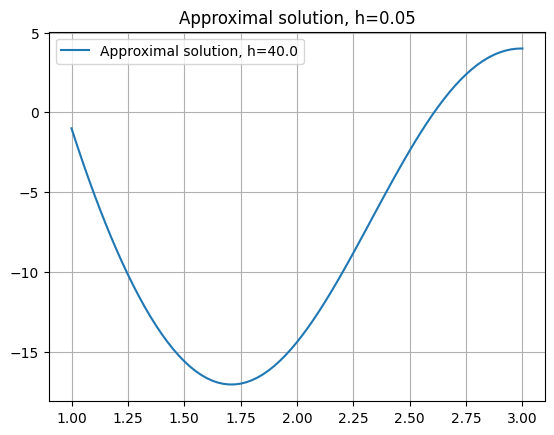

In [50]:
x, U, h_final = adaptive_step(h_start, epsilon)
plt.plot(x, U, label=f'Approximal solution, h={(b-a)/h_final}')
plt.title(f'Approximal solution, h={h_final}')
plt.legend()
plt.grid(True)
plt.show()